**Title: Multiple , Polynomial and Logistic Regression and Regularization algorithms**
Implement Logistic Regression with L1, L2, and ElasticNet regularisation, evaluate the model, and follow basic MLOps practices for reproducibility and scalability.
age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
https://docs.google.com/document/d/1FJOqAmkURTvj_-mxKzo27n272kewPXjuIiKHM4ixL-Y/edit?usp=sharing
Save this as heart_disease_v1.csv

In [1]:
import pandas as pd
df_iris = pd.read_csv("heart.csv")
print(df_iris)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import joblib

df=pd.read_csv("heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import joblib

df = pd.read_csv("heart.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

param_grid_C = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_en = {'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}

l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
grid_l1 = GridSearchCV(l1, param_grid_C, scoring='roc_auc', cv=5)
grid_l1.fit(X_train, y_train)

l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
grid_l2 = GridSearchCV(l2, param_grid_C, scoring='roc_auc', cv=5)
grid_l2.fit(X_train, y_train)

en = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000, random_state=42)
grid_en = GridSearchCV(en, param_grid_en, scoring='roc_auc', cv=5)
grid_en.fit(X_train, y_train)

def evaluate(name, model):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n=== {name} ===")
    print("Best Params:", model.get_params())
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

evaluate("L1", grid_l1.best_estimator_)
evaluate("L2", grid_l2.best_estimator_)
evaluate("ElasticNet", grid_en.best_estimator_)

models = {
    'L1': grid_l1.best_estimator_,
    'L2': grid_l2.best_estimator_,
    'ElasticNet': grid_en.best_estimator_
}
scores = {
    name: roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    for name, model in models.items()
}
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]
joblib.dump(best_model, f"best_logistic_{best_model_name}.pkl")

print(f"\nBest model: {best_model_name} saved as best_logistic_{best_model_name}.pkl")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


=== L1 ===
Best Params: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC-AUC: 0.8614718614718615

=== L2 ===
Best Params: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    rec

Implement Polynomial Regression for predicting non-linear relationships between variables and integrate MLOps practices for reproducibility and model tracking

Use student_scores_v1.csv

https://docs.google.com/document/d/1FJOqAmkURTvj_-mxKzo27n272kewPXjuIiKHM4ixL-Y/edit?usp=sharing


In [4]:
import csv

# The dataset with headers
data = [
    ['Hours_Studied', 'Score'],
    [1.0, 10],
    [2.0, 25],
    [3.0, 35],
    [4.0, 50],
    [5.0, 65],
    [6.0, 70],
    [7.0, 85],
    [8.0, 88],
    [9.0, 94],
    [10.0, 98]
]

# Define the filename
filename = 'student_scores_v1.csv'

# Write the data to the CSV file
with open(filename, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(data)

print(f"File '{filename}' created successfully.")

File 'student_scores_v1.csv' created successfully.


Polynomial Degree: 2
R² Score: 0.9995
RMSE: 0.79
Model saved to saved_models/polyreg_degree2_20250909_155901.pkl


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


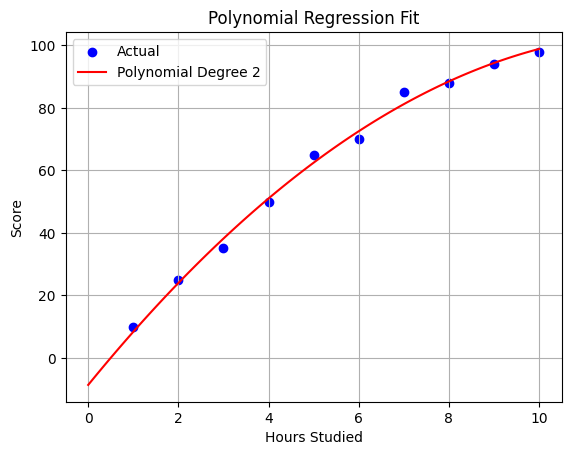

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib
import os
from datetime import datetime

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

df = pd.read_csv("student_scores_v1.csv")
X = df[["Hours_Studied"]]
y = df["Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Polynomial Degree: {degree}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)
model_filename = f"{model_dir}/polyreg_degree{degree}_{timestamp}.pkl"
joblib.dump((poly, model), model_filename)
print(f"Model saved to {model_filename}")

X_all = np.linspace(0, 10, 100).reshape(-1, 1)
X_all_poly = poly.transform(X_all)
y_all_pred = model.predict(X_all_poly)

plt.scatter(X, y, color='blue', label="Actual")
plt.plot(X_all, y_all_pred, color='red', label=f"Polynomial Degree {degree}")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()
